In [ ]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ('Apples', 10, 0.5),
    ('Bananas', 20, 0.3),
    ('Oranges', 15, 0.4),
    ('Apples', 5, 0.5),
    ('Bananas', 10, 0.3)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


Sales Summary:
   product  total_qty  revenue
0   Apples         15      7.5
1  Bananas         30      9.0
2  Oranges         15      6.0


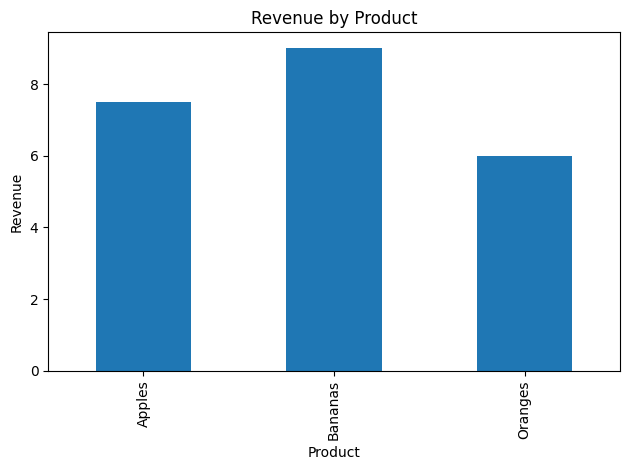

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)

# Step 4: Plot revenue bar chrt
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
